<a href="https://colab.research.google.com/github/Qaidsaher/Sana-ani_Features_Extractions/blob/main/yemeni_styles_music_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
def combine_csv_files(file_paths, output_csv):
    all_data = []

    for file in file_paths:
        df = pd.read_csv(file)
        all_data.append(df)

    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.to_csv(output_csv, index=False)
    print(f"Combined CSV file saved as {output_csv}")

In [13]:
import pandas as pd

def select_random_rows_per_label(input_csv, output_csv, num_rows=290):
    df = pd.read_csv(input_csv)

    if 'label' not in df.columns:
        raise ValueError("The CSV file must contain a 'label' column.")

    sampled_dfs = []

    # Group by label and sample from each group
    for label, group in df.groupby('label'):
        if len(group) < num_rows:
            print(f"Label '{label}' has fewer than {num_rows} rows. Selecting all available rows.")
            sampled_dfs.append(group)
        else:
            sampled_df = group.sample(n=num_rows, random_state=42)  # random_state for reproducibility
            sampled_dfs.append(sampled_df)

    # Concatenate all sampled groups into a single DataFrame
    sampled_df = pd.concat(sampled_dfs)
    sampled_df.to_csv(output_csv, index=False)
    print(f"Randomly selected rows saved as {output_csv}")


In [ ]:

# Example usage
file_paths = ['/content/adany_style_features.csv', '/content/hadrami_style_features.csv', '/content/lhgy_style_features.csv', '/content/snani_style_features.csv']
combined_csv = 'combined_features.csv'
sampled_csv = 'sampled_features.csv'

combine_csv_files(file_paths, combined_csv)
select_random_rows_per_label(combined_csv, sampled_csv, num_rows=290)

Classification accuracy with Random Forest: 96.12%
Classification report:
              precision    recall  f1-score   support

       adany       0.98      0.98      0.98        57
     hadrami       0.97      0.94      0.95        64
        lhgy       0.98      0.97      0.98        61
       snani       0.91      0.96      0.93        50

    accuracy                           0.96       232
   macro avg       0.96      0.96      0.96       232
weighted avg       0.96      0.96      0.96       232



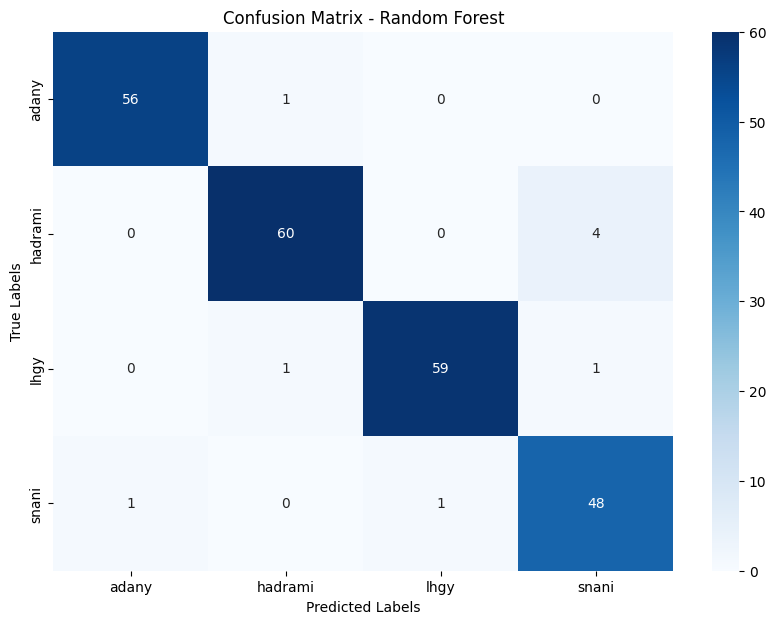

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def classify_features_with_random_forest(csv_file):
    df = pd.read_csv(csv_file)

    # Convert list-like strings to actual lists and then to float arrays
    def parse_list_string(s):
        return np.array(eval(s)).astype(float)

    for col in df.columns:
        if df[col].dtype == object and df[col].str.startswith('[').any():
            df[col] = df[col].apply(parse_list_string)

    # Expand list columns into separate columns
    expanded_df = pd.DataFrame()
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, np.ndarray)).all():
            # Expanding the array into separate columns
            col_df = pd.DataFrame(df[col].tolist(), columns=[f'{col}_{i}' for i in range(df[col].iloc[0].shape[0])])
            expanded_df = pd.concat([expanded_df, col_df], axis=1)
        else:
            expanded_df[col] = df[col]

    # Separate features and labels
    X = expanded_df.drop(columns=['label', 'file_name'])
    y = expanded_df['label']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Classification accuracy with Random Forest: {accuracy * 100:.2f}%")
    print("Classification report:")
    print(report)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=y.unique())
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Random Forest')
    plt.show()

# Example usage:
csv_file = '/content/sampled_features.csv'
classify_features_with_random_forest(csv_file)


K-Nearest Neighbors Accuracy: 0.96
Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

       adany       0.98      0.96      0.97        57
     hadrami       0.95      0.94      0.94        64
        lhgy       1.00      0.97      0.98        61
       snani       0.91      0.98      0.94        50

    accuracy                           0.96       232
   macro avg       0.96      0.96      0.96       232
weighted avg       0.96      0.96      0.96       232

Support Vector Machine Accuracy: 0.97
Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

       adany       0.98      0.98      0.98        57
     hadrami       0.98      0.94      0.96        64
        lhgy       0.98      0.98      0.98        61
       snani       0.92      0.98      0.95        50

    accuracy                           0.97       232
   macro avg       0.97      0.97      0.97       232
weighted avg 

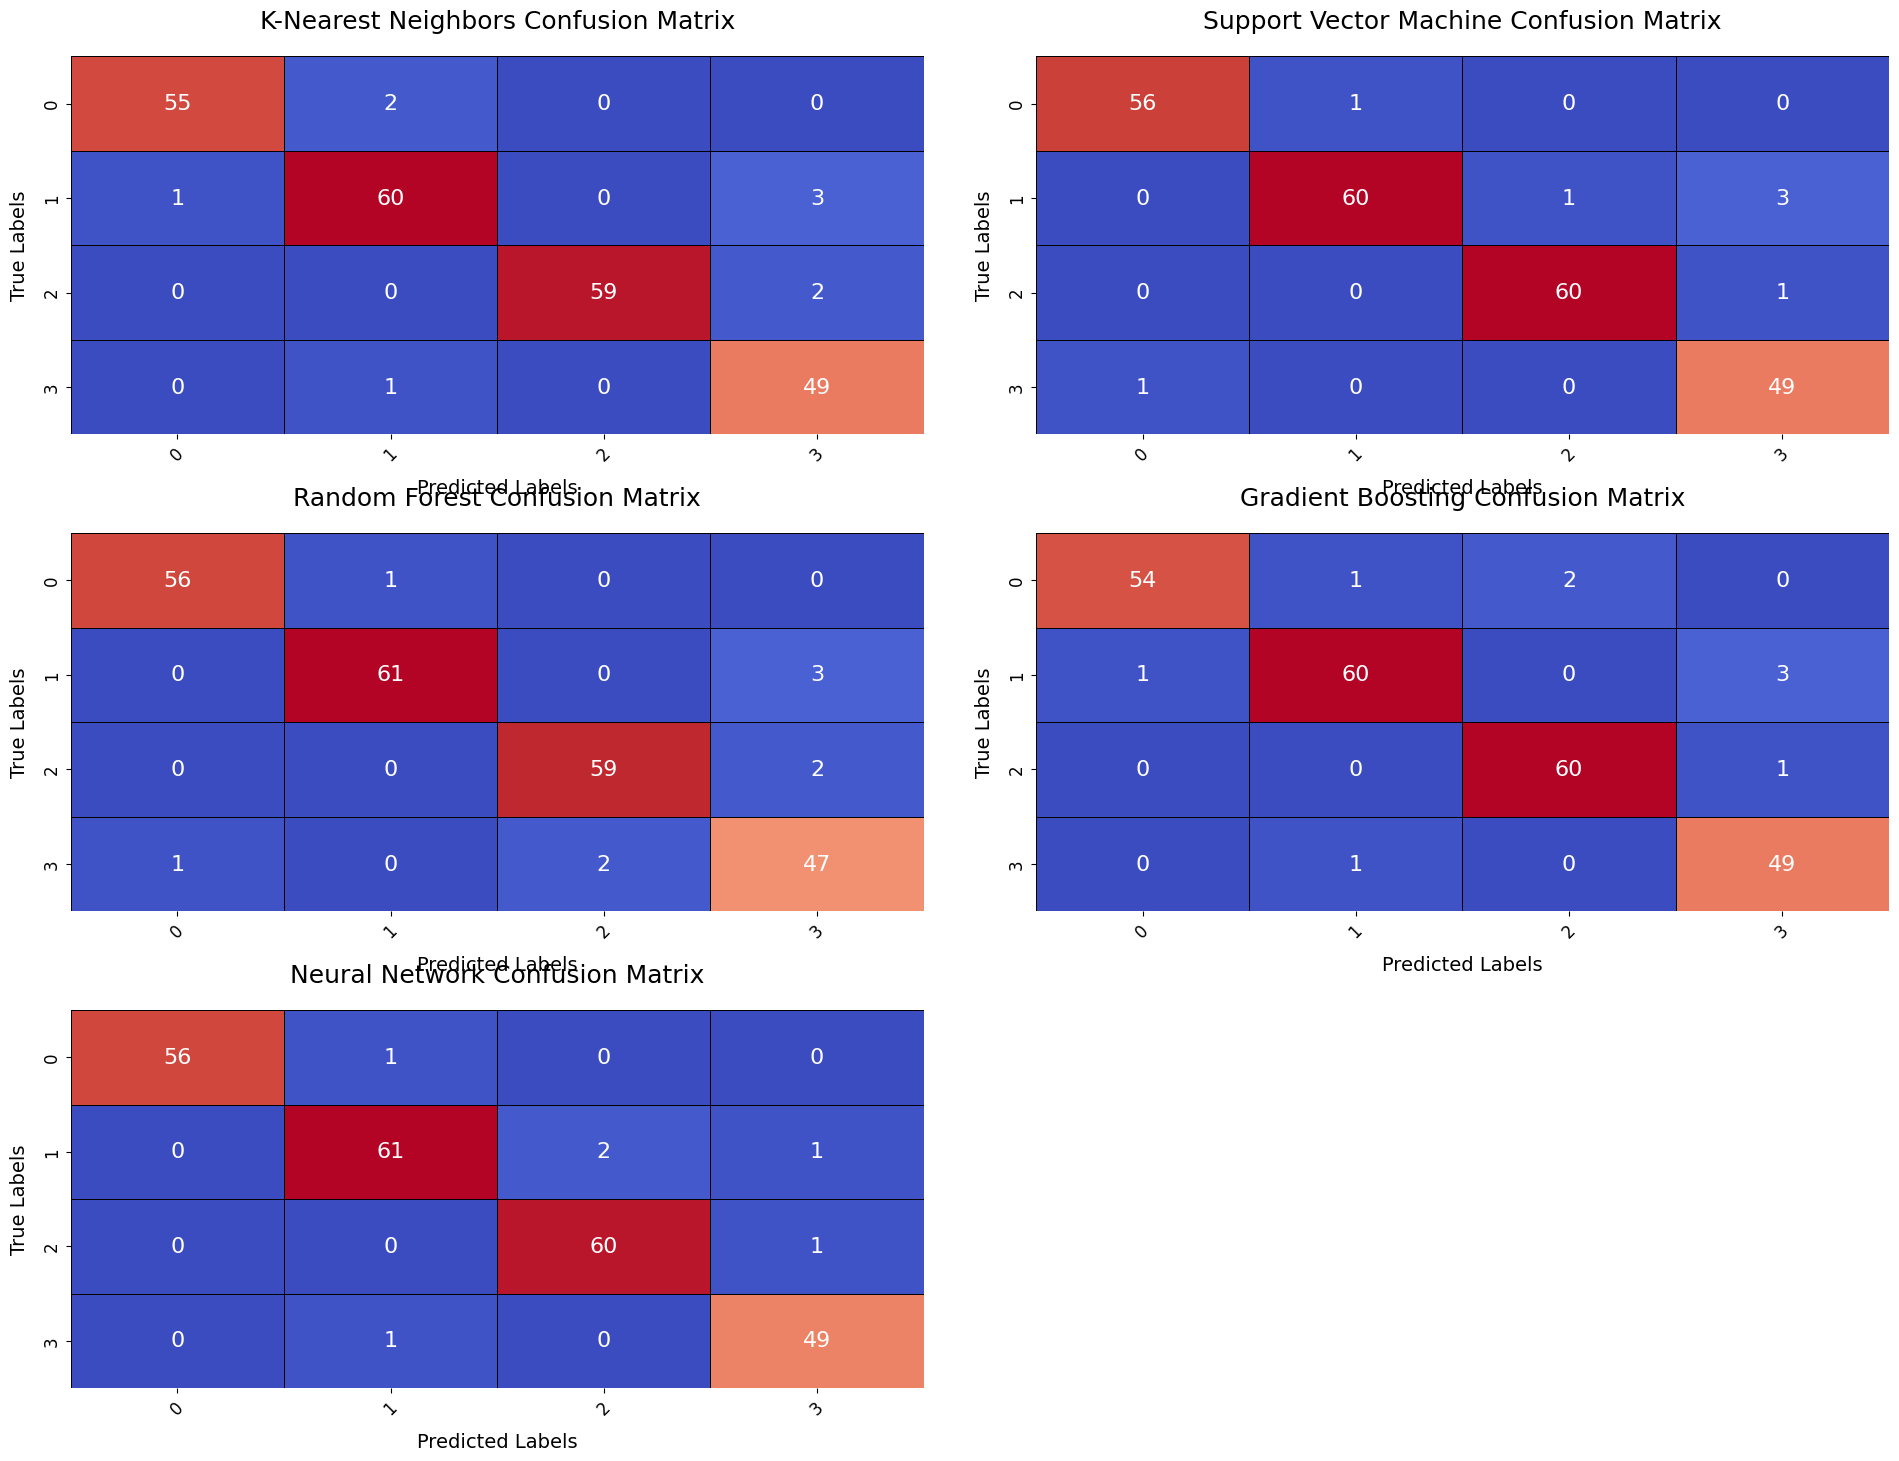

In [98]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=ax,
                cbar=False, annot_kws={"size": 16}, linewidths=0.5,
                linecolor='black')
    ax.set_title(title, size=18, pad=20)
    ax.set_xlabel('Predicted Labels', size=14, labelpad=10)
    ax.set_ylabel('True Labels', size=14, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=12)
    # Set ticks for the axes
    ax.set_xticks(np.arange(cm.shape[1]) + 0.5)
    ax.set_yticks(np.arange(cm.shape[0]) + 0.5)
    ax.set_xticklabels(np.arange(cm.shape[1]), rotation=45)
    ax.set_yticklabels(np.arange(cm.shape[0]))

# Prepare the dataset
df = pd.read_csv('/content/sampled_features.csv')

# Separate features and labels
X = df.drop(columns=['label', 'file_name', 'tempo'])
y = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate multiple models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=300)
}

# Create subplots for confusion matrices
num_models = len(models)
fig, axs = plt.subplots(num_models // 2 + num_models % 2, 2, figsize=(20, 5 * (num_models // 2 + num_models % 2)))
fig.tight_layout(pad=5.0)

# Flatten the axes array if it's a 2D array
if num_models > 1:
    axs = axs.flatten()
else:
    axs = [axs]

for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred, f'{model_name} Confusion Matrix', axs[i])

# Hide unused subplots
for j in range(len(models), len(axs)):
    axs[j].axis('off')

plt.show()


Features shape: (1160, 44)
Labels shape: (1160,)


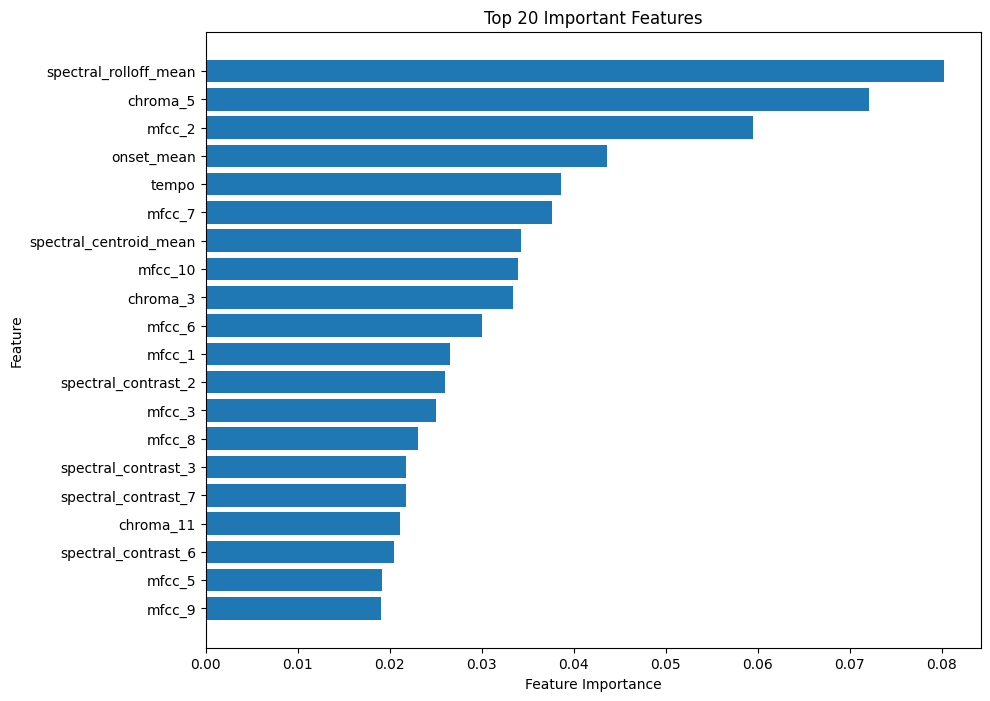

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt

# Load CSV data
df = pd.read_csv('/content/sampled_features.csv')

df['tempo'] = df['tempo'].apply(lambda x: float(x.strip('[]')) if isinstance(x, str) else x)
# Convert remaining columns to numeric
# for col in df.columns[:-1]:
#     if col != 'tempo':
#         df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle any NaN values if they exist
# df = df.dropna()

# Specify columns to drop
columns_to_drop = ['file_name']  # Adjust this list as needed

# Drop the specified columns
df_cleaned = df.drop(columns=columns_to_drop)

# Extract features and labels
# Assuming the first column is the label and all other columns are features
labels = df_cleaned.iloc[:, 0].values    # Labels (the first column)
features = df_cleaned.iloc[:, 1:].values  # Features (all columns except the first one)

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(features, encoded_labels)

# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'feature': df_cleaned.columns[1:],  # Use cleaned DataFrame columns for features
    'importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['feature'][:20], feature_importance_df['importance'][:20])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()
plt.show()


In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

def plot_history(hist, title, ax):
    ax.plot(hist.history["accuracy"], label="Train Accuracy")
    ax.plot(hist.history["val_accuracy"], label="Validation Accuracy")
    ax.set_ylabel("Accuracy")
    ax.legend(loc="lower right")
    ax.set_title(f"{title} - Accuracy Evaluation")

    ax2 = ax.twinx()
    ax2.plot(hist.history["loss"], label="Train Loss", linestyle='--')
    ax2.plot(hist.history["val_loss"], label="Validation Loss", linestyle='--')
    ax2.set_ylabel("Loss")
    ax2.legend(loc="upper right")

def add_gaussian_noise(X, noise_level=0.01):
    noise = np.random.normal(loc=0.0, scale=noise_level, size=X.shape)
    return X + noise

def create_cnn_model(input_shape, model_type='simple'):
    model = Sequential()

    if model_type == 'alexnet':
        model.add(Conv1D(96, 11, strides=4, activation='relu', padding='same', input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

        model.add(Conv1D(256, 5, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

        model.add(Conv1D(384, 3, activation='relu', padding='same'))
        model.add(Conv1D(384, 3, activation='relu', padding='same'))
        model.add(Conv1D(256, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

        model.add(Flatten())
        model.add(Dense(4096, activation='relu', kernel_regularizer='l2'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu', kernel_regularizer='l2'))
        model.add(Dropout(0.5))
        model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))

    elif model_type == 'simple':
        model.add(Conv1D(32, 3, activation='relu', padding='same', input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2, strides=2))
        model.add(Conv1D(64, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2, strides=2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
        model.add(Dropout(0.5))
        model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))

    elif model_type == 'vggnet':
        model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(Conv1D(64, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(128, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv1D(128, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(256, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv1D(256, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(512, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv1D(512, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
        model.add(Dropout(0.5))
        model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))

    else:
        raise ValueError("Unsupported model type. Choose from 'alexnet', 'simple', or 'vggnet'.")

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.weights.h5', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

def train_and_evaluate_models(csv_file):
    df = pd.read_csv(csv_file)
    df['tempo'] = df['tempo'].apply(lambda x: float(x.strip('[]')) if isinstance(x, str) else x)
    columns_to_drop = ['file_name']
    df_cleaned = df.drop(columns=columns_to_drop)

    labels = df_cleaned.iloc[:, 0].values
    features = df_cleaned.iloc[:, 1:].values

    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)
    X_train = add_gaussian_noise(X_train)
    X_test = add_gaussian_noise(X_test)

    X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
    X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

    # AlexNet
    alexnet_model = create_cnn_model((X_train_cnn.shape[1], 1), model_type='alexnet')
    history_alexnet = alexnet_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])
    alexnet_test_loss, alexnet_test_accuracy = alexnet_model.evaluate(X_test_cnn, y_test)

    # Simple CNN
    simple_cnn_model = create_cnn_model((X_train_cnn.shape[1], 1), model_type='simple')
    history_simple_cnn = simple_cnn_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_split=0.2,
                     callbacks=[early_stopping, model_checkpoint, reduce_lr])
    simple_cnn_test_loss, simple_cnn_test_accuracy = simple_cnn_model.evaluate(X_test_cnn, y_test)

    # Fully Connected Neural Network (FCNN)
    fcnn_model = Sequential()
    fcnn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'))
    fcnn_model.add(Dropout(0.5))
    fcnn_model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
    fcnn_model.add(Dropout(0.5))
    fcnn_model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))
    fcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_fcnn = fcnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2,
                   callbacks=[early_stopping, model_checkpoint, reduce_lr])
    fcnn_test_loss, fcnn_test_accuracy = fcnn_model.evaluate(X_test, y_test)

    # VGGNet
    vggnet_model = create_cnn_model((X_train_cnn.shape[1], 1), model_type='vggnet')
    history_vggnet = vggnet_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_split=0.2,
                     callbacks=[early_stopping, model_checkpoint, reduce_lr])
    vggnet_test_loss, vggnet_test_accuracy = vggnet_model.evaluate(X_test_cnn, y_test)

    # XGBoost
    xgb_model = XGBClassifier(eval_metric='mlogloss')
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)
    xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

    # Plot results
    fig, axs = plt.subplots(3, 2, figsize=(16, 18))

    plot_history(history_alexnet, 'AlexNet', axs[0, 0])
    axs[0, 0].set_title(f'AlexNet Accuracy: {alexnet_test_accuracy:.2f}')

    plot_history(history_simple_cnn, 'Simple CNN', axs[0, 1])
    axs[0, 1].set_title(f'Simple CNN Accuracy: {simple_cnn_test_accuracy:.2f}')

    plot_history(history_fcnn, 'FCNN', axs[1, 0])
    axs[1, 0].set_title(f'FCNN Accuracy: {fcnn_test_accuracy:.2f}')

    plot_history(history_vggnet, 'VGGNet', axs[1, 1])
    axs[1, 1].set_title(f'VGGNet Accuracy: {vggnet_test_accuracy:.2f}')

    sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', ax=axs[2, 0], cmap='Blues')
    axs[2, 0].set_title('XGBoost Confusion Matrix')

    axs[2, 1].axis('off')
    axs[2, 1].text(0.1, 0.5, f'XGBoost Accuracy: {xgb_accuracy:.2f}', fontsize=12)

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 326ms/step - accuracy: 0.5837 - loss: 37.4623 - val_accuracy: 0.4247 - val_loss: 15.9492 - learning_rate: 0.0010
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9131 - loss: 11.9802 - val_accuracy: 0.2742 - val_loss: 7.2694 - learning_rate: 0.0010
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.9756 - loss: 4.9667 - val_accuracy: 0.3871 - val_loss: 4.1338 - learning_rate: 0.0010
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9780 - loss: 2.5954 - val_accuracy: 0.2957 - val_loss: 3.1832 - learning_rate: 0.0010
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.9703 - loss: 1.5947 - val_accuracy: 0.2849 - val_loss: 2.5153 - learning_rate: 0.0010
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9978 - loss: 0.9396 - val_accuracy: 0.2742 - val_loss: 2.2116 - learning_rate: 0.0010
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9880 - loss: 0.6419 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.3016 - loss: 3.0501 - val_accuracy: 0.6667 - val_loss: 2.3638 - learning_rate: 0.0010
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5309 - loss: 2.5224 - val_accuracy: 0.7742 - val_loss: 2.1086 - learning_rate: 0.0010
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6379 - loss: 2.2532 - val_accuracy: 0.8118 - val_loss: 1.9197 - learning_rate: 0.0010
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6674 - loss: 2.0679 - val_accuracy: 0.8280 - val_loss: 1.7699 - learning_rate: 0.0010
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6891 - loss: 1.9366 - val_accuracy: 0.8280 - val_loss: 1.6456 - learning_rate: 0.0010
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.6598 - loss: 2.4021
Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 385ms/step - accuracy: 0.5928 - loss: 8.2816 - val_accuracy: 0.4462 - val_loss: 7.4650 - learning_rate: 0.0010
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━

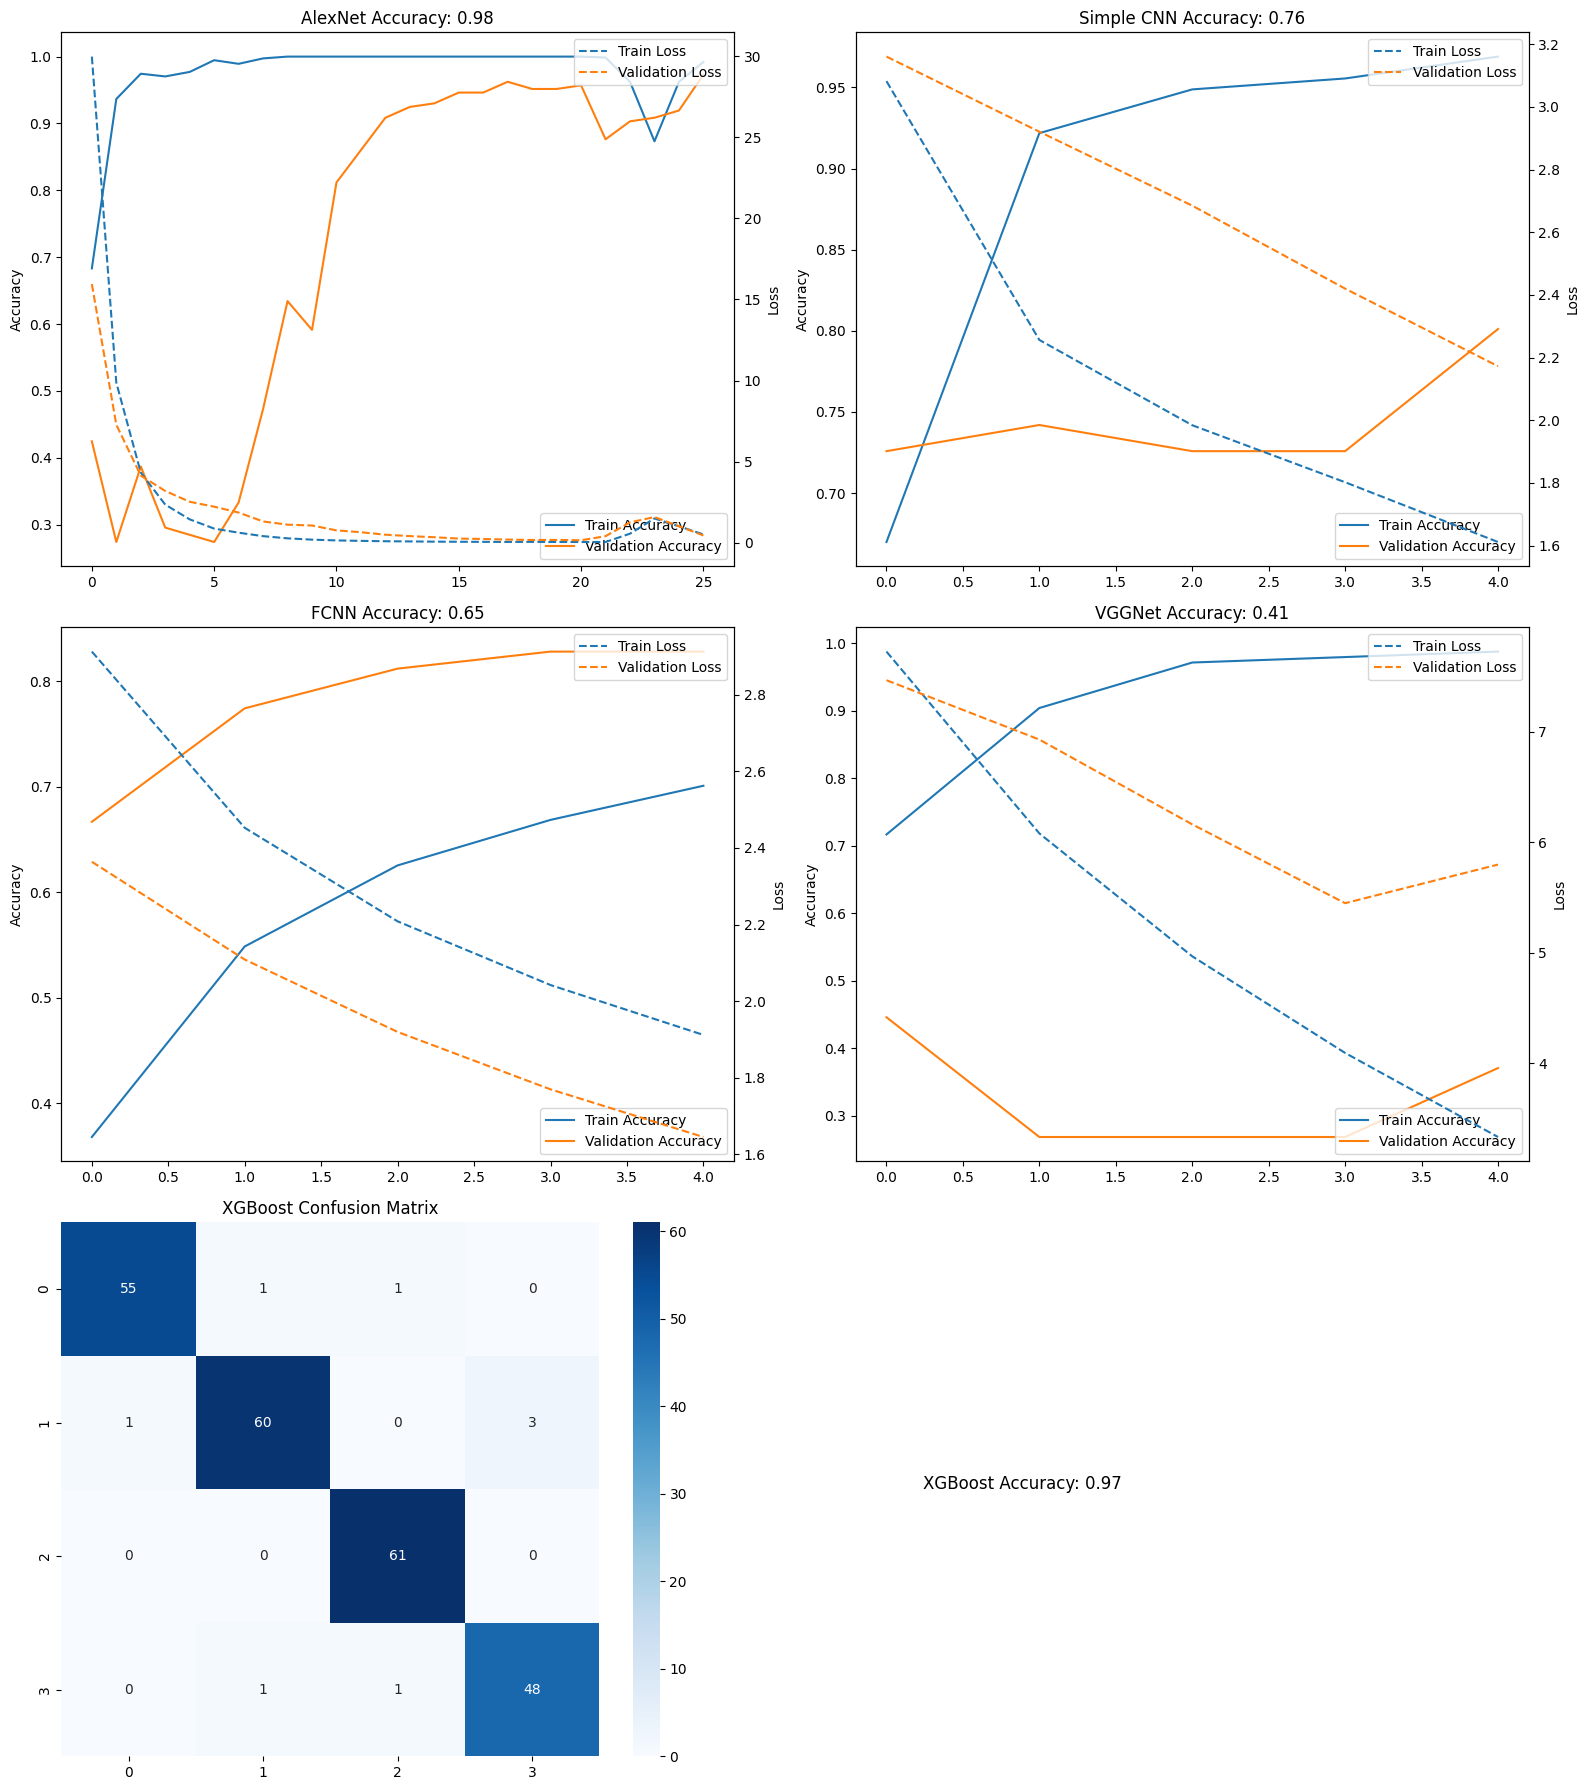

In [94]:
# Call the function with the path to your CSV file
train_and_evaluate_models('/content/sampled_features.csv')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 265ms/step - accuracy: 0.5166 - loss: 38.3726 - val_accuracy: 0.3817 - val_loss: 16.5085 - learning_rate: 0.0010
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.8977 - loss: 12.4621 - val_accuracy: 0.4516 - val_loss: 6.9245 - learning_rate: 0.0010
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.9693 - loss: 4.9311 - val_accuracy: 0.5914 - val_loss: 3.7805 - learning_rate: 0.0010
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.9641 - loss: 2.4881 - val_accuracy: 0.6828 - val_loss: 2.5831 - learning_rate: 0.0010
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9899 - loss: 1.4225 - val_accuracy: 0.6075 - val_loss: 1.8792 - learning_rate: 0.0010
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9705 - loss: 0.9163 - val_accuracy: 0.4516 - val_loss: 1.9229 - learning_rate: 0.0010
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.9787 - loss: 0.6763

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.5044 - loss: 3.6667 - val_accuracy: 0.8333 - val_loss: 3.1711 - learning_rate: 0.0010
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8577 - loss: 2.3386 - val_accuracy: 0.8495 - val_loss: 2.9191 - learning_rate: 0.0010
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9335 - loss: 2.0695 - val_accuracy: 0.7258 - val_loss: 2.6840 - learning_rate: 0.0010
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9633 - loss: 1.8310 - val_accuracy: 0.6989 - val_loss: 2.4733 - learning_rate: 0.0010
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 1.6346 - val_accuracy: 0.7258 - val_loss: 2.2480 - learning_rate: 0.0010
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7924 - loss: 3.1886
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.2911 - loss: 3.0881 - val_accuracy: 0.6559 - val_loss: 2.4364 - learning_rate: 0.0010
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5192 - loss: 2.5382 - val_accuracy: 0.7204 - val_loss: 2.1550 - learning_rate: 0.0010
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5939 - loss: 2.2279 - val_accuracy: 0.7849 - val_loss: 1.9442 - learning_rate: 0.0010
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6768 - loss: 2.0826 - val_accuracy: 0.8172 - val_loss: 1.7724 - learning_rate: 0.0010
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7248 - loss: 1.8576 - val_accuracy: 0.8387 - val_loss: 1.6412 - learning_rate: 0.0010
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.6590 - loss: 2.4667
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step - accuracy: 0.6431 - loss: 7.9953 - val_accuracy: 0.2688 - val_loss: 7.4703 - learning_rate: 0.0010
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8932 - loss: 6.1294 - val_accuracy: 0.2634 - val_loss: 6.9842 - learning_rate: 0.0010
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9578 - loss: 5.0209 - val_accuracy: 0.4301 - val_loss: 6.2478 - learning_rate: 0.0010
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9649 - loss: 4.1190 - val_accuracy: 0.2742 - val_loss: 6.0628 - learning_rate: 0.0010
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9928 - loss: 3.3310 - val_accuracy: 0.3978 - val_loss: 5.9065 - learning_rate: 0.0010
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.2139 - loss: 7.5071
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:55:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AlexNet Confusion Matrix:
[[56  1  0  0]
 [ 0 61  1  2]
 [ 1  0 60  0]
 [ 0  1  0 49]]

Simple CNN Confusion Matrix:
[[41  3  0 13]
 [ 2 59  0  3]
 [13  5 37  6]
 [ 5  7  0 38]]

FCNN Confusion Matrix:
[[44  4  8  1]
 [ 3 47 12  2]
 [ 8  2 48  3]
 [15  8  9 18]]

VGGNet Confusion Matrix:
[[ 0  0  0 57]
 [ 0  0  0 64]
 [ 0  0  0 61]
 [ 0  0  0 50]]

XGBoost Confusion Matrix:
[[55  1  1  0]
 [ 1 59  1  3]
 [ 1  0 59  1]
 [ 1  1  1 47]]


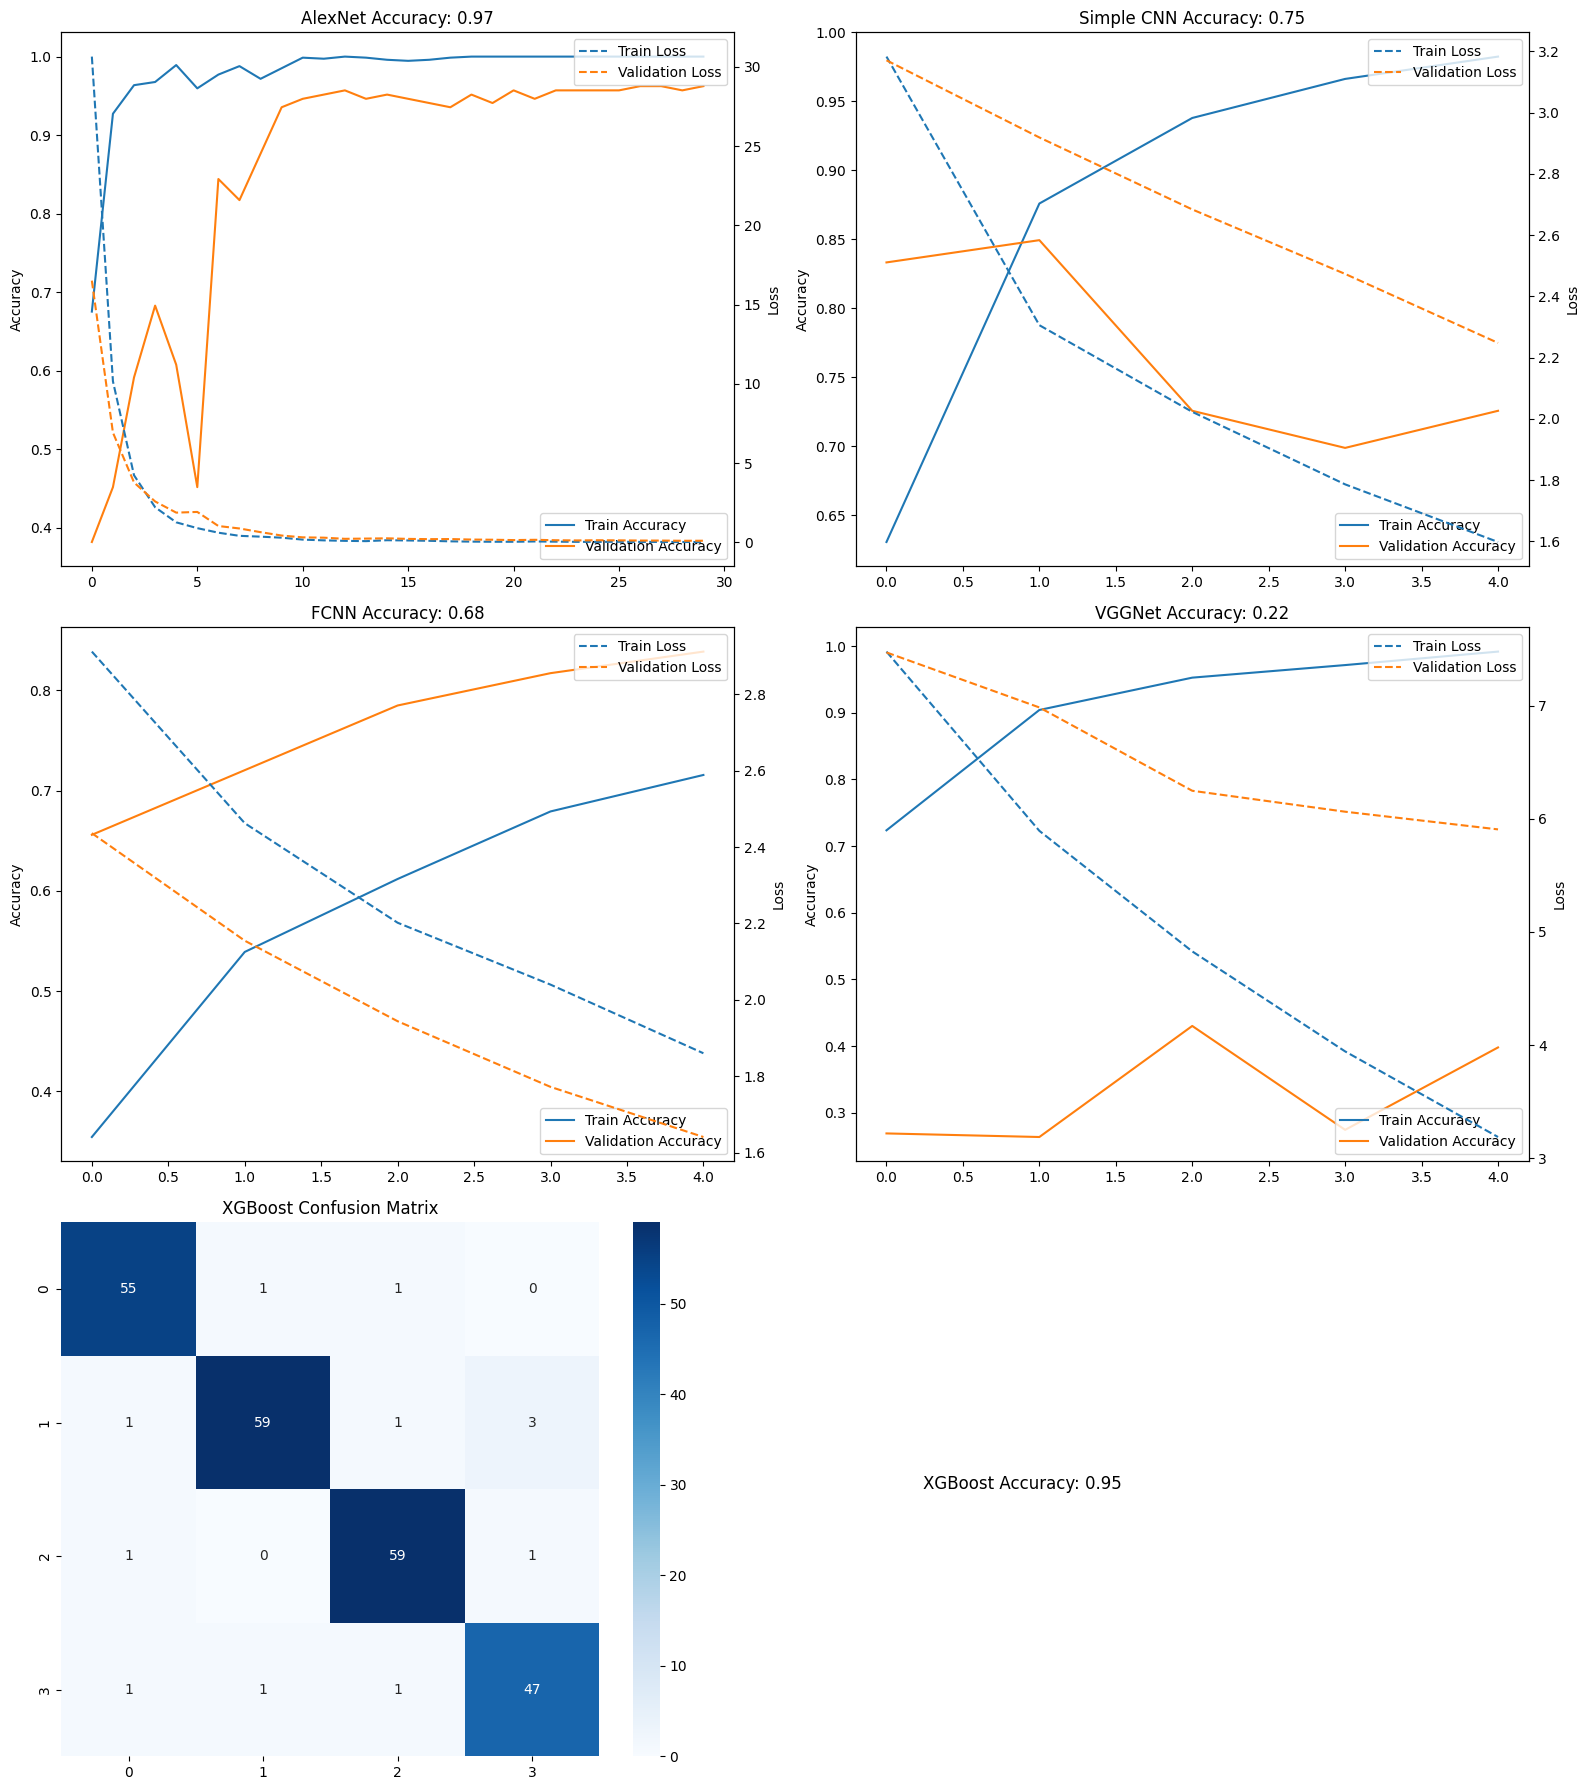

In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def add_gaussian_noise(X, noise_level=0.01):
    noise = np.random.normal(loc=0.0, scale=noise_level, size=X.shape)
    return X + noise

def create_cnn_model(input_shape, model_type='simple'):
    model = Sequential()

    if model_type == 'alexnet':
        model.add(Conv1D(96, 11, strides=4, activation='relu', padding='same', input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

        model.add(Conv1D(256, 5, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

        model.add(Conv1D(384, 3, activation='relu', padding='same'))
        model.add(Conv1D(384, 3, activation='relu', padding='same'))
        model.add(Conv1D(256, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

        model.add(Flatten())
        model.add(Dense(4096, activation='relu', kernel_regularizer='l2'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu', kernel_regularizer='l2'))
        model.add(Dropout(0.5))
        model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))

    elif model_type == 'simple':
        model.add(Conv1D(32, 3, activation='relu', padding='same', input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2, strides=2))
        model.add(Conv1D(64, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2, strides=2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
        model.add(Dropout(0.5))
        model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))

    elif model_type == 'vggnet':
        model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(Conv1D(64, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(128, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv1D(128, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(256, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv1D(256, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(512, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv1D(512, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
        model.add(Dropout(0.5))
        model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))

    else:
        raise ValueError("Unsupported model type. Choose from 'alexnet', 'simple', or 'vggnet'.")

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.weights.h5', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

def train_and_evaluate_models(csv_file):
    df = pd.read_csv(csv_file)
    df['tempo'] = df['tempo'].apply(lambda x: float(x.strip('[]')) if isinstance(x, str) else x)
    columns_to_drop = ['file_name']
    df_cleaned = df.drop(columns=columns_to_drop)

    labels = df_cleaned.iloc[:, 0].values
    features = df_cleaned.iloc[:, 1:].values

    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)
    X_train = add_gaussian_noise(X_train)
    X_test = add_gaussian_noise(X_test)

    X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
    X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

    # AlexNet
    alexnet_model = create_cnn_model((X_train_cnn.shape[1], 1), model_type='alexnet')
    history_alexnet = alexnet_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])
    alexnet_test_loss, alexnet_test_accuracy = alexnet_model.evaluate(X_test_cnn, y_test)
    alexnet_predictions = np.argmax(alexnet_model.predict(X_test_cnn), axis=-1)
    alexnet_conf_matrix = confusion_matrix(y_test, alexnet_predictions)

    # Simple CNN
    simple_cnn_model = create_cnn_model((X_train_cnn.shape[1], 1), model_type='simple')
    history_simple_cnn = simple_cnn_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])
    simple_cnn_test_loss, simple_cnn_test_accuracy = simple_cnn_model.evaluate(X_test_cnn, y_test)
    simple_cnn_predictions = np.argmax(simple_cnn_model.predict(X_test_cnn), axis=-1)
    simple_cnn_conf_matrix = confusion_matrix(y_test, simple_cnn_predictions)

    # Fully Connected Neural Network (FCNN)
    fcnn_model = Sequential()
    fcnn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'))
    fcnn_model.add(Dropout(0.5))
    fcnn_model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
    fcnn_model.add(Dropout(0.5))
    fcnn_model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))
    fcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_fcnn = fcnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2,
                callbacks=[early_stopping, model_checkpoint, reduce_lr])
    fcnn_test_loss, fcnn_test_accuracy = fcnn_model.evaluate(X_test, y_test)
    fcnn_predictions = np.argmax(fcnn_model.predict(X_test), axis=-1)
    fcnn_conf_matrix = confusion_matrix(y_test, fcnn_predictions)

    # VGGNet
    vggnet_model = create_cnn_model((X_train_cnn.shape[1], 1), model_type='vggnet')
    history_vggnet = vggnet_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])
    vggnet_test_loss, vggnet_test_accuracy = vggnet_model.evaluate(X_test_cnn, y_test)
    vggnet_predictions = np.argmax(vggnet_model.predict(X_test_cnn), axis=-1)
    vggnet_conf_matrix = confusion_matrix(y_test, vggnet_predictions)

    # XGBoost
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)
    xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

    # Print confusion matrices
    print("AlexNet Confusion Matrix:")
    print(alexnet_conf_matrix)
    print("\nSimple CNN Confusion Matrix:")
    print(simple_cnn_conf_matrix)
    print("\nFCNN Confusion Matrix:")
    print(fcnn_conf_matrix)
    print("\nVGGNet Confusion Matrix:")
    print(vggnet_conf_matrix)
    print("\nXGBoost Confusion Matrix:")
    print(xgb_conf_matrix)

    # Plot results
    fig, axs = plt.subplots(3, 2, figsize=(16, 18))

    plot_history(history_alexnet, 'AlexNet', axs[0, 0])
    axs[0, 0].set_title(f'AlexNet Accuracy: {alexnet_test_accuracy:.2f}')

    plot_history(history_simple_cnn, 'Simple CNN', axs[0, 1])
    axs[0, 1].set_title(f'Simple CNN Accuracy: {simple_cnn_test_accuracy:.2f}')

    plot_history(history_fcnn, 'FCNN', axs[1, 0])
    axs[1, 0].set_title(f'FCNN Accuracy: {fcnn_test_accuracy:.2f}')

    plot_history(history_vggnet, 'VGGNet', axs[1, 1])
    axs[1, 1].set_title(f'VGGNet Accuracy: {vggnet_test_accuracy:.2f}')

    sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', ax=axs[2, 0], cmap='Blues')
    axs[2, 0].set_title('XGBoost Confusion Matrix')

    axs[2, 1].axis('off')
    axs[2, 1].text(0.1, 0.5, f'XGBoost Accuracy: {xgb_accuracy:.2f}', fontsize=12)

    plt.tight_layout()
    plt.show()

# Example call
train_and_evaluate_models('/content/sampled_features.csv')
